In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve

In [2]:
df=pd.read_csv("h1n1.csv")

In [3]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [4]:
df.isna().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [5]:
df.shape

(26707, 34)

In [6]:
cols=['unique_id','age_bracket','qualification','race','sex','income_level','marital_status','housing_status','employment','census_msa','no_of_adults','no_of_children']

In [7]:
data=df.drop(cols,axis=1)

In [8]:
data.shape

(26707, 22)

In [9]:
data.isnull().sum()

h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
h1n1_vaccine                     0
dtype: int64

In [10]:
data['h1n1_worry'].value_counts()

2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_worry, dtype: int64

In [11]:
data['h1n1_worry']=data['h1n1_worry'].fillna(-1)

In [12]:
data['h1n1_awareness'].value_counts()

1.0    14598
2.0     9487
0.0     2506
Name: h1n1_awareness, dtype: int64

In [13]:
data['h1n1_awareness']=data['h1n1_awareness'].fillna(1)

In [14]:
data['antiviral_medication'].value_counts()

0.0    25335
1.0     1301
Name: antiviral_medication, dtype: int64

In [15]:
data['antiviral_medication']=data['antiviral_medication'].fillna(0)

In [16]:
data['contact_avoidance'].value_counts()

1.0    19228
0.0     7271
Name: contact_avoidance, dtype: int64

In [17]:
data['contact_avoidance']=data['contact_avoidance'].fillna(1)

In [18]:
data['bought_face_mask'].value_counts()

0.0    24847
1.0     1841
Name: bought_face_mask, dtype: int64

In [19]:
data['bought_face_mask']=data['bought_face_mask'].fillna(0)

In [20]:
data['wash_hands_frequently'].value_counts()

1.0    22015
0.0     4650
Name: wash_hands_frequently, dtype: int64

In [21]:
data['wash_hands_frequently']=data['wash_hands_frequently'].fillna(1)

In [22]:
data['avoid_large_gatherings'].value_counts()

0.0    17073
1.0     9547
Name: avoid_large_gatherings, dtype: int64

In [23]:
data['avoid_large_gatherings']=data['avoid_large_gatherings'].fillna(0)

In [24]:
data['reduced_outside_home_cont'].value_counts()

0.0    17644
1.0     8981
Name: reduced_outside_home_cont, dtype: int64

In [25]:
data['reduced_outside_home_cont']=data['reduced_outside_home_cont'].fillna(0)

In [26]:
data['avoid_touch_face'].value_counts()

1.0    18001
0.0     8578
Name: avoid_touch_face, dtype: int64

In [27]:
data['avoid_touch_face']=data['avoid_touch_face'].fillna(1)

In [28]:
data['dr_recc_h1n1_vacc'].value_counts()

0.0    19139
1.0     5408
Name: dr_recc_h1n1_vacc, dtype: int64

In [29]:
data['dr_recc_h1n1_vacc']=data['dr_recc_h1n1_vacc'].fillna(0)

In [30]:
data['dr_recc_seasonal_vacc'].value_counts()

0.0    16453
1.0     8094
Name: dr_recc_seasonal_vacc, dtype: int64

In [31]:
data['dr_recc_seasonal_vacc']=data['dr_recc_seasonal_vacc'].fillna(0)

In [32]:
data['chronic_medic_condition'].value_counts()

0.0    18446
1.0     7290
Name: chronic_medic_condition, dtype: int64

In [33]:
data['chronic_medic_condition']=data['chronic_medic_condition'].fillna(0)

In [34]:
data['cont_child_undr_6_mnths'].value_counts()

0.0    23749
1.0     2138
Name: cont_child_undr_6_mnths, dtype: int64

In [35]:
data['cont_child_undr_6_mnths']=data['cont_child_undr_6_mnths'].fillna(0)

In [36]:
data['is_health_worker'].value_counts()

0.0    23004
1.0     2899
Name: is_health_worker, dtype: int64

In [37]:
data['is_health_worker']=data['is_health_worker'].fillna(0)

In [38]:
data['has_health_insur'].value_counts()

1.0    12697
0.0     1736
Name: has_health_insur, dtype: int64

In [39]:
data['has_health_insur']=data['has_health_insur'].fillna(1)

In [40]:
data['is_h1n1_vacc_effective'].value_counts()

4.0    11683
5.0     7166
3.0     4723
2.0     1858
1.0      886
Name: is_h1n1_vacc_effective, dtype: int64

In [41]:
data['is_h1n1_vacc_effective']=data['is_h1n1_vacc_effective'].fillna(4)

In [42]:
data['is_h1n1_risky'].value_counts()

2.0    9919
1.0    8139
4.0    5394
5.0    1750
3.0    1117
Name: is_h1n1_risky, dtype: int64

In [43]:
data['is_h1n1_risky']=data['is_h1n1_risky'].fillna(-1)

In [44]:
data['sick_from_h1n1_vacc'].value_counts()

2.0    9129
1.0    8998
4.0    5850
5.0    2187
3.0     148
Name: sick_from_h1n1_vacc, dtype: int64

In [45]:
data['sick_from_h1n1_vacc']=data['sick_from_h1n1_vacc'].fillna(-1)

In [46]:
data['is_seas_vacc_effective'].value_counts()

4.0    11629
5.0     9973
2.0     2206
1.0     1221
3.0     1216
Name: is_seas_vacc_effective, dtype: int64

In [47]:
data['is_seas_vacc_effective']=data['is_seas_vacc_effective'].fillna(-1)

In [48]:
data['is_seas_risky'].value_counts()

2.0    8954
4.0    7630
1.0    5974
5.0    2958
3.0     677
Name: is_seas_risky, dtype: int64

In [49]:
data['is_seas_risky']=data['is_seas_risky'].fillna(-1)

In [50]:
data['sick_from_seas_vacc'].value_counts()

1.0    11870
2.0     7633
4.0     4852
5.0     1721
3.0       94
Name: sick_from_seas_vacc, dtype: int64

In [51]:
data['sick_from_seas_vacc']=data['sick_from_seas_vacc'].fillna(-1)

In [52]:
data.isna().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
h1n1_vaccine                 0
dtype: int64

In [53]:
new_cols=['h1n1_worry','h1n1_awareness','antiviral_medication','antiviral_medication','contact_avoidance','bought_face_mask','wash_hands_frequently','avoid_large_gatherings','reduced_outside_home_cont','avoid_touch_face','dr_recc_h1n1_vacc','dr_recc_seasonal_vacc','chronic_medic_condition','cont_child_undr_6_mnths','is_health_worker','has_health_insur','is_h1n1_vacc_effective','is_h1n1_risky','sick_from_h1n1_vacc','is_seas_vacc_effective','is_seas_risky ','sick_from_seas_vacc','h1n1_vaccine']

In [54]:
x=data.drop(['h1n1_vaccine'],axis=1)

In [55]:
y=data['h1n1_vaccine']

In [56]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=1/3, random_state=11, stratify = y)

In [57]:
model = LogisticRegression()
model.fit(xtrain,ytrain)
pred = model.predict_proba(xtest)[:,1]

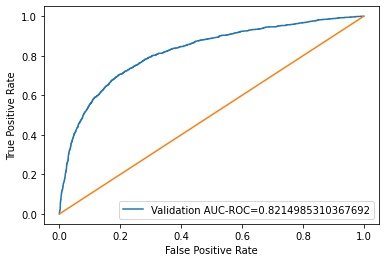

In [58]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest,pred)
auc = roc_auc_score(ytest, pred)
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc))
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [59]:
pred_val = model.predict(xtest)

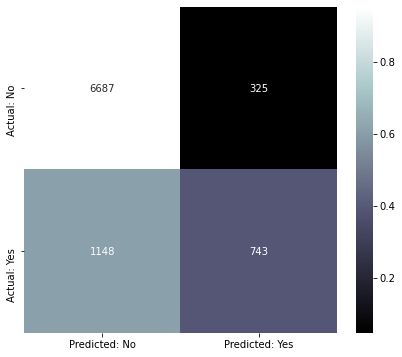

In [60]:
label_preds = pred_val

cm = confusion_matrix(ytest,label_preds)


def plot_confusion_matrix(cm, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=['Predicted: No','Predicted: Yes'], yticklabels=['Actual: No','Actual: Yes'], cmap=cmap)

plot_confusion_matrix(cm, ['No', 'Yes'])

In [61]:
recall_score(ytest,pred_val)

0.39291380222104705

In [62]:
precision_score(ytest,pred_val)

0.6956928838951311

In [63]:
from sklearn.metrics import f1_score
f1_score(ytest,pred_val)

0.5021966880702939

In [64]:
accuracy_score(ytest,pred_val)

0.8345501516342806